In [12]:
import pandas as pd
import json
from datetime import datetime
import os
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from utils.generateFinalRow import generateFinalRows


ratioKeys = ['psRatio', 'peRatio', 'priceToBook', 'evToEbitda', 'evToEbit', 'priceToFreeCashFlow', 'evToSales', 'evToGrossProfit', 'priceToGrossProfit']
yKeys = ['yAdjustedPriceSpinoffExcl1Year', 'yAdjustedPrice1Year', 'yPrice1Year']
y2Keys = ['yAdjustedPriceSpinoffExcl2Year', 'yAdjustedPrice2Year', 'yPrice2Year']
numericalKeys = ratioKeys + yKeys + y2Keys

In [2]:

if not os.path.isfile('../data/temp.csv'):
    fileNames = os.listdir('../data/results')
    companyDf = pd.DataFrame()
    i = 0
    for fileName in fileNames:
        with open('../data/results/' + fileName) as json_data:
            data = json.load(json_data)
            companyDf, i = generateFinalRows(data, ratioKeys, fileName, i, companyDf)
    companyDf.to_csv('../data/temp.csv', sep='\t')


df = pd.read_csv('../data/temp.csv', sep='\t')


In [3]:
# TODO: DROP evToSales evToGrossProfit and calculate other columns again. More data will be available

In [15]:
# df = df.dropna()
# TODO: normalize ratios. Could have better results.
dfNorm = pd.DataFrame(normalize(df[ratioKeys]), columns=ratioKeys)
dfY = df[yKeys + y2Keys]
dfNorm = dfNorm.join(dfY)

In [10]:
dfNorm

,psRatio,peRatio,priceToBook,evToEbitda,evToEbit,priceToFreeCashFlow,evToSales,evToGrossProfit,priceToGrossProfit,yAdjustedPriceSpinoffExcl1Year,yAdjustedPrice1Year,yPrice1Year
0,0.044235,0.876829,0.042438,0.211086,0.373651,0.161183,0.043268,0.086812,0.088609,-0.015081,-0.015081,-0.025846
1,0.044319,0.878847,0.042436,0.209040,0.370120,0.161457,0.042812,0.086001,0.088764,-0.086332,-0.086332,-0.096253
2,0.044302,0.878909,0.042488,0.208943,0.369958,0.161533,0.042877,0.086013,0.088862,-0.018394,-0.018394,-0.026093
3,0.052309,0.827920,0.050355,0.251473,0.422227,0.209986,0.050505,0.101010,0.104467,0.007376,0.007376,-0.002869
4,0.052019,0.831690,0.050630,0.248519,0.417389,0.209157,0.050013,0.099871,0.104038,0.132782,0.132782,0.122923
...,...,...,...,...,...,...,...,...,...,...,...,...
38447,0.131196,0.514348,0.223630,0.328189,0.376592,0.571399,0.136166,0.195403,0.188346,-0.217827,-0.217827,-0.227814
38448,0.132751,0.514150,0.215815,0.334975,0.383139,0.564489,0.137969,0.197006,0.189613,-0.218040,-0.218040,-0.228554
38449,0.132858,0.514636,0.216031,0.334293,0.382378,0.565020,0.137656,0.196637,0.189740,-0.273689,-0.273689,-0.285019
38450,0.132964,0.515688,0.216445,0.333434,0.381359,0.565269,0.137348,0.196183,0.189852,-0.275841,-0.275841,-0.286898


Text(0.5, 1.0, 'Not normalized absolute values')

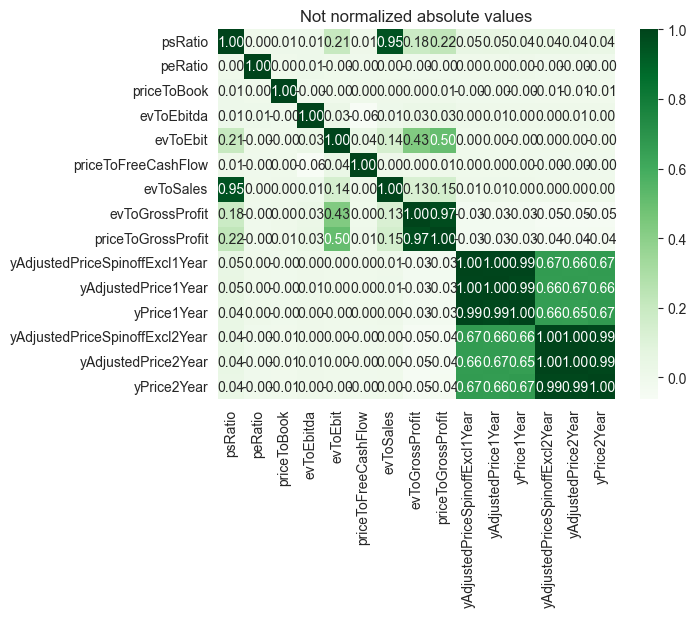

In [13]:
matrix = df[numericalKeys].corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Not normalized absolute values")

Text(0.5, 1.0, 'Normalized absolute values')

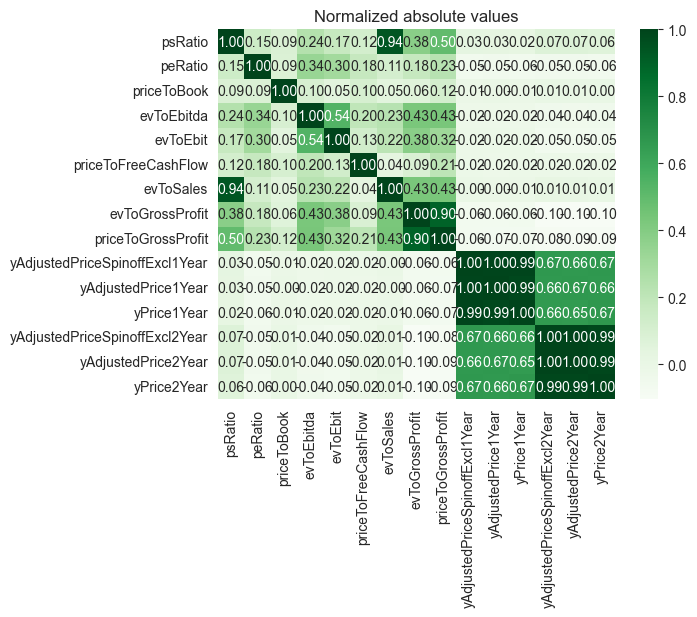

In [18]:
matrix = dfNorm.corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Normalized absolute values")

In [8]:

for i, key in enumerate(keys):
    med = statistics.median(df[key])
    mean = statistics.mean(df[key])
    # print("key: {}, median: {}, mean: {}".format(key, med, round(mean, 2)))
    
    # TODO: outliers from returns too
    q_low = df[key].quantile(0.01)
    q_hi  = df[key].quantile(0.99)
    
    df_filtered = df[(df[key] < q_hi) & (df[key] > q_low)]
    sns.scatterplot(data=df_filtered, x=key, y='yAdjustedTotalPrice')
    plt.show()


NameError: name 'keys' is not defined